## Importaciones

In [ ]:
from skimage.filters import sobel, median, unsharp_mask
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage

## Funciones

In [2]:
def comparar_images(imagen1, imagen2):
  _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax1.set_title('Imagen Original')
  ax1.axis('off')

  ax2.imshow(imagen2, cmap='gray')
  ax2.set_title('Imagen Procesada')
  ax2.axis('off')

  plt.show()

## Imagen

Shape: (419, 835)


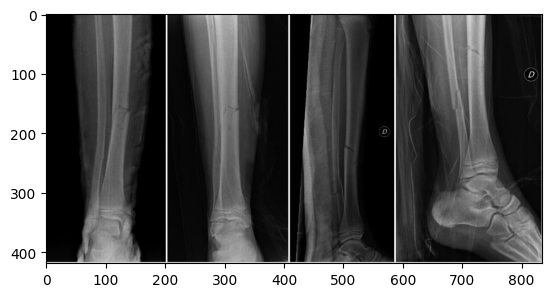

In [19]:
image = skimage.io.imread('./imgs/torus_3.jpg', as_gray=True)
print("Shape:", image.shape)
plt.imshow(image, cmap='gray')
plt.show()

## Filtros

### Mediana

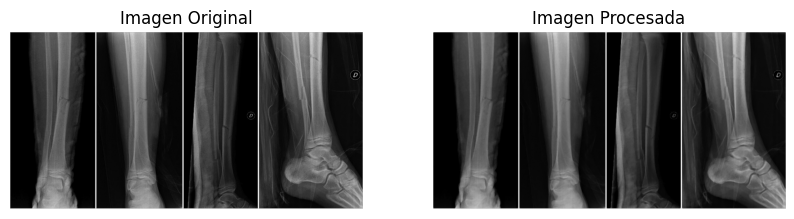

In [ ]:
imagen_suavizada_median = median(image)
comparar_images(image, imagen_suavizada_median)

### Mejora de Nitidez
Mejorar la nitidez de la imagen resaltando los bordes y detalles finos.

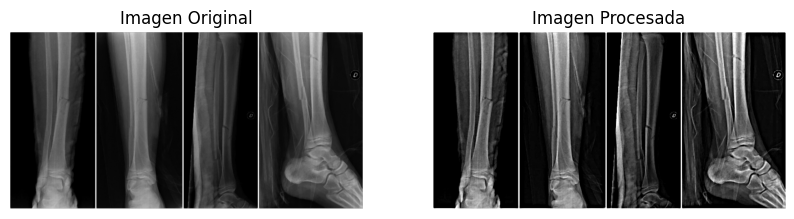

In [ ]:
image_nitida = unsharp_mask(imagen_suavizada_median, radius=5, amount=2)
comparar_images(imagen_suavizada_median, image_nitida)

## Detección de bordes

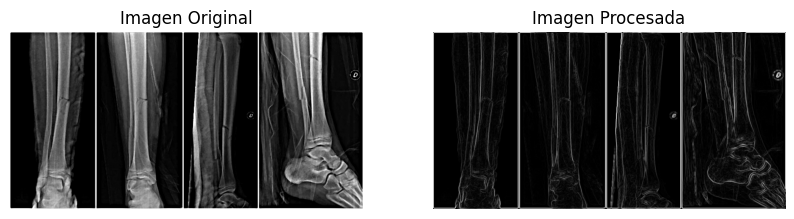

In [ ]:
image_bordes = sobel(image_nitida)
comparar_images(image_nitida, image_bordes)

## Resultados

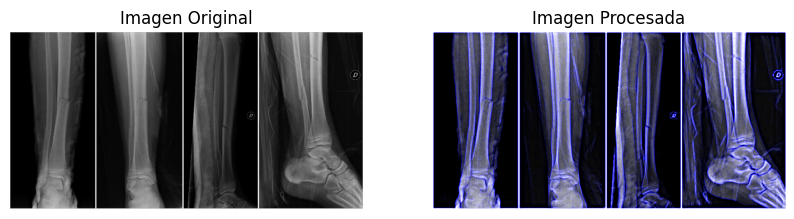

In [161]:
# Convertir imagen a RGB
image_rgb = cv2.cvtColor((image_nitida * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

# Crear una máscara de color azul donde están los bordes
edges_color = np.zeros_like(image_rgb)
edges_color[:, :, 0] = (image_bordes * 255).astype(np.uint8)  # Azul en canal B

# Superponer bordes sobre la imagen con transparencia (alpha=4)
overlay = cv2.addWeighted(image_rgb, 1, edges_color, 4, 0)

# Mostrar resultado
comparar_images(image, cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))


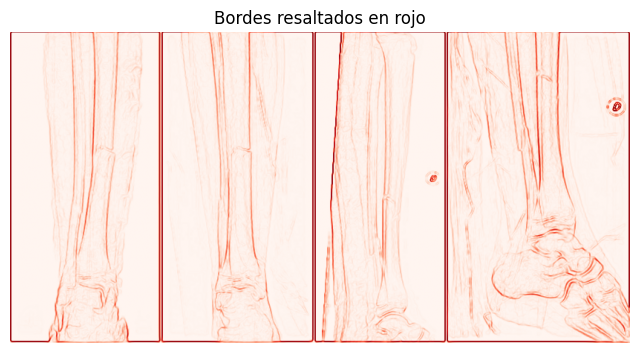

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(image_bordes, cmap="Reds")
plt.axis("off")
plt.title("Bordes resaltados en rojo")
plt.show()